In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

colors = {
    'main': '#CFD923',
    'second': '#EB5D18',
    'extra': '#E0E0E0'
}

def inter_from_256(x):
    return np.interp(x=x,xp=[0,255],fp=[0,1])

cdict = {
    'red': (
            (0, inter_from_256(224), inter_from_256(224)),
            (0.5, inter_from_256(207), inter_from_256(207)),
            (1, inter_from_256(235), inter_from_256(235)),
    ),
    'green': (
        (0, inter_from_256(224), inter_from_256(224)),
        (0.5, inter_from_256(217), inter_from_256(217)),
        (1, inter_from_256(93), inter_from_256(93)),
    ),
    'blue': (
        (0, inter_from_256(224), inter_from_256(224)),
        (0.5, inter_from_256(35), inter_from_256(35)),
        (1, inter_from_256(24), inter_from_256(24)),
        
    ),
           
}

brunoyam_cmap = LinearSegmentedColormap('brunoyam_cmap', segmentdata=cdict)

plt.rcParams.update({'font.family':'Closer'})
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

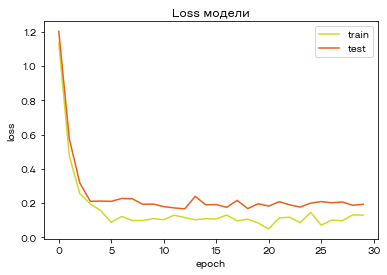

In [58]:
n = 30
np.random.seed(0)
train_loss = 0.1 + np.exp(-(np.arange(n))) + np.random.normal(0, 0.02, n)
test_loss = 0.2 + np.exp(-(np.arange(n))) + np.random.normal(0, 0.02, n)

plt.plot(train_loss, color=colors['main'])
plt.plot(test_loss, color=colors['second'])
plt.legend(['train', 'test'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss модели')
plt.savefig('../images/loss_normal.jpg')

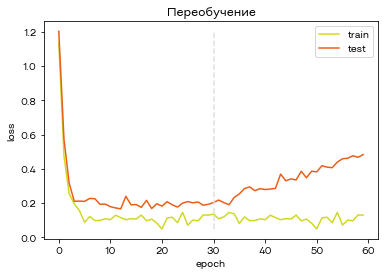

In [59]:
np.random.seed(0)
train_loss_2 = 0.1 + np.exp(-(np.arange(n, 2 * n))) + np.random.normal(0, 0.02, n)
test_loss_2 = 0.2 + np.exp(-(np.arange(n, 2 * n))) + np.random.normal(0, 0.02, n) + 0.01 * np.arange(n)

train_loss_total = np.hstack((train_loss, train_loss_2))
test_loss_total = np.hstack((test_loss, test_loss_2))

vertical_line_x = np.ones(n) * 30
vertical_line_y = np.linspace(min(train_loss_total), max(test_loss_total), n)

plt.plot(train_loss_total, color=colors['main'])
plt.plot(test_loss_total, color=colors['second'])
plt.plot(vertical_line_x, vertical_line_y, '--', color=colors['extra'])

plt.legend(['train', 'test'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Переобучение')

plt.savefig('../images/loss_overfit.jpg')